# Purpose:
- Remove trials based on fluorescence signal
    - Use expert_mice.csv and reduced_F.npy   
- Follow up of 231202_signal_QC.ipynb
- Save refined_frame_time.pkl in each roi directory
    - Add 'remove' column to reduced_frame_time.pkl
    - When analyzing, use frame_whisker_behavior.pkl
    - Make scripts for analysis to treat the dataframes

In [2]:
from pathlib import Path
from suite2p.io import BinaryFile
import h5py
import napari
import numpy as np
from matplotlib import pyplot as plt
from suite2p.gui import drawroi
import pandas as pd
import re
base_dir = Path(r'E:\TPM\JK\h5')

In [19]:
# First, check if all usable data has frame_whisker_behavior.pkl files
expert_mice_df = pd.read_csv(base_dir / 'expert_mice.csv', index_col=0)
use_mice_df = expert_mice_df.loc[expert_mice_df['depth_matched'].astype(bool) & 
                                 ~expert_mice_df['processing_error'].astype(bool) &
                                 ((expert_mice_df.session_type == 'training') |
                                  (expert_mice_df.session_type.str.contains('test')))]


delimiters = [' ', '[', ']']
regexPattern = '|'.join(map(re.escape, delimiters))
use_mice_df['remove_frame_ind'] = use_mice_df.remove_frame_ind.apply(lambda x: [int(s) for s in re.split(regexPattern, x) if s.isdigit()])

C:\Users\shires\AppData\Local\Temp/ipykernel_8172/1668339645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_mice_df['remove_frame_ind'] = use_mice_df.remove_frame_ind.apply(lambda x: [int(s) for s in re.split(regexPattern, x) if s.isdigit()])


In [12]:
use_mice_df.query("mouse==52 and session=='13'")

,Unnamed: 0.1,mouse,plane,session,session_type,depth_matched,processing_error,remove_frame_ind
1218,1218,52,1,13,training,True,False,"[0, 239, 10550, 10585]"
1251,1251,52,2,13,training,True,False,"[0, 239, 10550, 10585]"
1284,1284,52,3,13,training,True,False,"[0, 239, 10550, 10585]"
1317,1317,52,4,13,training,True,False,"[0, 239, 10550, 10585]"
1350,1350,52,5,13,training,True,False,[0]
1383,1383,52,6,13,training,True,False,[0]
1416,1416,52,7,13,training,True,False,[0]
1449,1449,52,8,13,training,True,False,[0]


In [45]:
use_mice_df

,mouse,plane,session,session_type,depth_matched,processing_error,remove_frame_ind
0,25,1,001,training,True,False,[0]
1,25,1,002,training,True,False,[0]
2,25,1,003,training,True,False,[0]
3,25,1,004,test_naive,True,False,[0]
4,25,1,005,training,True,False,[0]
...,...,...,...,...,...,...,...
1459,52,8,023,test_expert,True,False,[0]
1460,52,8,024,training,True,False,"[0, 156]"
1463,52,8,027,training,True,False,[0]
1464,52,8,028,training,True,False,[0]


In [30]:
use_mice_df.session.unique()

array(['001', '002', '003', '004', '005', '006', '013', '015', '017',
       '019', '007', '008', '009', '010', '011', '012', '014', '016',
       '018', '020', '021', '022', '023', '024', '028', '029', '027'],
      dtype=object)

In [31]:
print(len(expert_mice_df))
print(len(use_mice_df))

1472
756


In [34]:
for i in range(len(use_mice_df)):
    mouse_row = use_mice_df.iloc[i]
    mouse = mouse_row['mouse']
    plane = mouse_row['plane']
    session_num = int(mouse_row['session'])
    plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
    fwb_file = plane_dir / f'JK{mouse:03}_S{session_num:02}_plane{plane}_frame_whisker_behavior.pkl'
    if not (fwb_file).exists():
        print(fwb_file)

In [28]:
test = pd.read_pickle(fwb_file)
test

,trialNum,frame_start_time,frame_end_time,trial_duration,frame_index,kappaH_onset,kappaV_onset,phi_onset,theta_onset,arc_length_onset,touch_count,delta_kappaH,delta_kappaV,delta_phi,delta_theta,slide_distance,touch_duration,pole_up_frame,pole_moving_frame
0,7,0.107740,0.140170,4.248928,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,7,0.237459,0.269889,4.248928,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,7,0.367178,0.399608,4.248928,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,7,0.496897,0.529327,4.248928,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,7,0.626616,0.659046,4.248928,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,491,5.355340,5.387769,6.112625,8161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
8162,491,5.485059,5.517488,6.112625,8162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8163,491,5.614778,5.647207,6.112625,8163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8164,491,5.744496,5.776926,6.112625,8164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [29]:
mouse = 36
plane = 1
session_num = 5
plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
session_dir = plane_dir / f'{session_num:03}' / 'plane0'
roi_dir = session_dir / 'roi'
test_fn = roi_dir / 'reduced_frame_time.pkl'
test = pd.read_pickle(test_fn)
test

,trialNum,frame_start_time,frame_end_time,trial_duration,frame_index
0,2,0.374209,0.406638,6.097677,1
1,2,0.503928,0.536357,6.097677,2
2,2,0.633647,0.666076,6.097677,3
3,2,0.763366,0.795795,6.097677,4
4,2,0.893084,0.925514,6.097677,5
...,...,...,...,...,...
8342,531,3.465041,3.497471,8.356863,8881
8343,531,3.594760,3.627190,8.356863,8882
8344,531,3.724479,3.756909,8.356863,8883
8345,531,3.854198,3.886627,8.356863,8884


In [51]:
np.unique([len(x) for x in use_mice_df.remove_frame_ind.values])

array([1, 2, 4])

In [41]:
i = 115
row = use_mice_df.iloc[i]
mouse = row['mouse']
plane = row['plane']
session_num = int(row['session'])
plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
session_dir = plane_dir / f'{session_num:03}' / 'plane0'
roi_dir = session_dir / 'roi'
print(roi_dir)
frame_time_df = pd.read_pickle(roi_dir / 'reduced_frame_time.pkl')
frame_time_df['remove'] = False
remove_frames = row.remove_frame_ind
np.isnan(remove_frames)

E:\TPM\JK\h5\027\plane_1\004\plane0\roi


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\TPM\\JK\\h5\\027\\plane_1\\004\\plane0\\roi\\reduced_frame_time.pkl'

## Some roi directories do not have reduced_frame_time.pkl
- Make them first

In [42]:
# Which ones do not have it?
# Among use_mice_df

for i in range(len(use_mice_df)):
    row = use_mice_df.iloc[i]
    mouse = row['mouse']
    plane = row['plane']
    session_num = int(row['session'])
    plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
    session_dir = plane_dir / f'{session_num:03}' / 'plane0'
    roi_dir = session_dir / 'roi'
    df_fn = roi_dir / 'reduced_frame_time.pkl'
    if not df_fn.exists():
        print(f'{mouse:03} plane {plane} session {session_num:03} does not have reduced_frame_time.pkl')


027 plane 1 session 004 does not have reduced_frame_time.pkl
027 plane 2 session 004 does not have reduced_frame_time.pkl
027 plane 3 session 004 does not have reduced_frame_time.pkl
027 plane 4 session 004 does not have reduced_frame_time.pkl
027 plane 5 session 004 does not have reduced_frame_time.pkl
027 plane 6 session 004 does not have reduced_frame_time.pkl
027 plane 7 session 004 does not have reduced_frame_time.pkl
027 plane 8 session 004 does not have reduced_frame_time.pkl


In [47]:
# turns out that it was JK027 S004
# Make them (refactor the code from 231201_signal_qc.ipynb - def save_signal)
# They all have other files
# It was because these sessions were run again (have prev_suite2p_run folder)
# but somehow frame_time.pkl was not saved
def save_signal(mouse, plane, session_num, base_dir):
    session = f'{session_num:03}'
    
    plane_dir = base_dir / f'{mouse:03}/plane_{plane}'
    session_dir = plane_dir / f'{session}/plane0'
    roi_dir = session_dir / 'roi'

    # Get frame time to remove first and last frame of each trial
    # to remove negative ticks from laser blocking
    frame_time_fn = plane_dir / f'{mouse:03}_{session}_plane_{plane}_frame_time.pkl'
    frame_time = pd.read_pickle(frame_time_fn)
    reduced_frame_time = frame_time.groupby('trialNum').apply(lambda x: x.iloc[1:-1]).reset_index(drop=True)

    # check if the number of frames in the reduced_frame_time is the same as the number of frames in the F_reduced.npy
    F_reduced_fn = roi_dir / 'F_reduced.npy'
    F_reduced = np.load(F_reduced_fn)
    num_frames_from_F_reduced = F_reduced.shape[1]
    num_frames_from_reduced_frame_time = len(reduced_frame_time)
    assert num_frames_from_F_reduced == num_frames_from_reduced_frame_time, f'Number of frames in F_reduced.npy ({num_frames_from_F_reduced}) and reduced_frame_time.pkl ({num_frames_from_reduced_frame_time}) are different'

    # Save the results
    reduced_frame_time_fn = roi_dir / 'reduced_frame_time.pkl'
    reduced_frame_time.to_pickle(reduced_frame_time_fn)

mouse = 27
for plane in range(1,9):
    session_num = 4
    save_signal(mouse, plane, session_num, base_dir)

## Back to updating frame time dataframe

In [53]:
mouse = 27
plane = 5
session_num = 15
plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
session_dir = plane_dir / f'{session_num:03}' / 'plane0'
roi_dir = session_dir / 'roi'
frame_time_df = pd.read_pickle(roi_dir / 'reduced_frame_time.pkl')
frame_time_df

,trialNum,frame_start_time,frame_end_time,trial_duration,frame_index
0,52,0.346276,0.378706,5.580891,1
1,52,0.475995,0.508425,5.580891,2
2,52,0.605714,0.638144,5.580891,3
3,52,0.735433,0.767863,5.580891,4
4,52,0.865152,0.897582,5.580891,5
...,...,...,...,...,...
7775,463,5.409115,5.441544,6.098627,8198
7776,463,5.538834,5.571263,6.098627,8199
7777,463,5.668553,5.700982,6.098627,8200
7778,463,5.798272,5.830701,6.098627,8201


In [85]:
mouse = 27
plane = 5
session_num = 15
df_ind = np.where((use_mice_df.mouse == mouse) & (use_mice_df.plane == plane) & (use_mice_df.session == f'{session_num:03}'))[0][0]
row = use_mice_df.iloc[df_ind]

In [87]:
plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
session_dir = plane_dir / f'{session_num:03}' / 'plane0'
roi_dir = session_dir / 'roi'
frame_time_df = pd.read_pickle(roi_dir / 'reduced_frame_time.pkl')
frame_time_df['remove_frame'] = False
frame_time_df['remove_trial'] = False
remove_frames = row.remove_frame_ind
if len(remove_frames) > 1:
    if len(remove_frames) == 2:
        remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
    elif len(remove_frames) == 4:
        remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
        remove_frame_df_inds = np.append(remove_frame_df_inds, np.arange(remove_frames[2], remove_frames[3]))
    else:
        raise ValueError(f'Length of remove_frames is {len(remove_frames)}, which is not 1, 2 or 4')

    frame_time_df.loc[remove_frame_df_inds, 'remove_frame'] = True
    remove_trial_ind = np.where(frame_time_df.groupby('trialNum').remove_frame.sum().values>0)[0]
    trial_nums = frame_time_df.groupby('trialNum').remove_frame.sum().index.values
    remove_trial_nums = trial_nums[remove_trial_ind]
    frame_time_df.loc[frame_time_df.trialNum.isin(remove_trial_nums), 'remove_trial'] = True

In [89]:
# 5 s for all use_mice_df

###
## IMPORTANT! The index of manual trial removal is based on the reduced_frame_time.pkl
## NOT the actual frame index
###

for i in range(len(use_mice_df)):
    row = use_mice_df.iloc[i]
    mouse = row['mouse']
    plane = row['plane']
    session_num = int(row['session'])
    plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
    session_dir = plane_dir / f'{session_num:03}' / 'plane0'
    roi_dir = session_dir / 'roi'
    frame_time_df = pd.read_pickle(roi_dir / 'reduced_frame_time.pkl')
    frame_time_df['remove_frame'] = False
    frame_time_df['remove_trial'] = False
    remove_frames = row.remove_frame_ind
    if len(remove_frames) > 1:
        if len(remove_frames) == 2:
            remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
        elif len(remove_frames) == 4:
            remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
            remove_frame_df_inds = np.append(remove_frame_df_inds, np.arange(remove_frames[2], remove_frames[3]))
        elif len(remove_frames) == 6:
            remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
            remove_frame_df_inds = np.append(remove_frame_df_inds, np.arange(remove_frames[2], remove_frames[3]))
            remove_frame_df_inds = np.append(remove_frame_df_inds, np.arange(remove_frames[4], remove_frames[5]))
        else:
            raise ValueError(f'Length of remove_frames is {len(remove_frames)}, which is not 1, 2, 4, or 6')

        frame_time_df.loc[remove_frame_df_inds, 'remove_frame'] = True
        remove_trial_ind = np.where(frame_time_df.groupby('trialNum').remove_frame.sum().values>0)[0]
        trial_nums = frame_time_df.groupby('trialNum').remove_frame.sum().index.values
        remove_trial_nums = trial_nums[remove_trial_ind]
        frame_time_df.loc[frame_time_df.trialNum.isin(remove_trial_nums), 'remove_trial'] = True
    save_fn = roi_dir / 'refined_frame_time.pkl'
    frame_time_df.to_pickle(save_fn)


In [20]:

mouse = 52
for plane in range(1, 5):
    session_num = 13
    plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
    session_dir = plane_dir / f'{session_num:03}' / 'plane0'
    roi_dir = session_dir / 'roi'
    frame_time_df = pd.read_pickle(roi_dir / 'reduced_frame_time.pkl')
    frame_time_df['remove_frame'] = False
    frame_time_df['remove_trial'] = False
    remove_frames = use_mice_df.query(f'mouse=={mouse} and plane=={plane} and session=="{session_num}"').remove_frame_ind.values[0]
    print(len(remove_frames))
    if len(remove_frames) > 1:
        if len(remove_frames) == 2:
            remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
        elif len(remove_frames) == 4:
            remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
            remove_frame_df_inds = np.append(remove_frame_df_inds, np.arange(remove_frames[2], remove_frames[3]))
        elif len(remove_frames) == 6:
            remove_frame_df_inds = np.arange(remove_frames[0], remove_frames[1])
            remove_frame_df_inds = np.append(remove_frame_df_inds, np.arange(remove_frames[2], remove_frames[3]))
            remove_frame_df_inds = np.append(remove_frame_df_inds, np.arange(remove_frames[4], remove_frames[5]))
        else:
            raise ValueError(f'Length of remove_frames is {len(remove_frames)}, which is not 1, 2, 4, or 6')

        frame_time_df.loc[remove_frame_df_inds, 'remove_frame'] = True
        remove_trial_ind = np.where(frame_time_df.groupby('trialNum').remove_frame.sum().values>0)[0]
        trial_nums = frame_time_df.groupby('trialNum').remove_frame.sum().index.values
        remove_trial_nums = trial_nums[remove_trial_ind]
        frame_time_df.loc[frame_time_df.trialNum.isin(remove_trial_nums), 'remove_trial'] = True
    save_fn = roi_dir / 'refined_frame_time.pkl'
    frame_time_df.to_pickle(save_fn)

6
6
6
6


# QC signal again using the refined frame time dataframe
- per session, per plane

In [90]:
qc_save_dir = base_dir / 'qc' / 'signal_qc'


for i in range(len(use_mice_df)):
    row = use_mice_df.iloc[i]
    mouse = row['mouse']
    plane = row['plane']
    session_num = int(row['session'])
    plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
    session_dir = plane_dir / f'{session_num:03}' / 'plane0'
    roi_dir = session_dir / 'roi'
    refined_frame_time = pd.read_pickle(roi_dir / 'refined_frame_time.pkl')
    use_ind = np.where(~refined_frame_time.remove_trial.values)[0]

    F = np.load(roi_dir / 'F_reduced.npy')
    mean_F = F.mean(axis=0)
    mean_F = mean_F[use_ind]
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(mean_F)
    ax.set_title(f'{mouse:03} plane {plane} session {session_num:03}')
    fig.savefig(qc_save_dir / f'{mouse:03}_plane{plane}_session{session_num:03}.png')
    plt.close(fig)

# Some sessions look a little bit weird
- Check by looking at the movie
- Also consult the behavior note

In [170]:
mouse = 52
session = 27
plane = 6

first_frame = 0000
last_frame = 10000

plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'

session_dir = plane_dir / f'{session:03}' / 'plane0'
roi_dir = session_dir / 'roi'
frame_time_df = pd.read_pickle(roi_dir / 'refined_frame_time.pkl')
selected_ft_df = frame_time_df.query('remove_trial==False')

last_frame = min(last_frame, len(selected_ft_df))
used_frames = np.arange(first_frame, last_frame)

start_ind = selected_ft_df.iloc[used_frames[0]].frame_index
end_ind = selected_ft_df.iloc[used_frames[-1]].frame_index

data_fn = session_dir / 'data.bin'
# data_fn = Path('F:') / f'{mouse:03}' / f'plane_{plane}' / f'{session:03}' / 'plane0/data.bin'
ops = np.load(session_dir / 'ops.npy', allow_pickle=True).item()

num_frames = end_ind - start_ind + 1

bin_size = 20

num_bins = num_frames // bin_size

start_inds = np.arange(num_bins) * bin_size + start_ind
binned_movie = np.zeros((num_bins, ops['Ly'], ops['Lx']), dtype=np.float32)
with BinaryFile(Ly=ops['Ly'], Lx=ops['Lx'], read_filename=data_fn) as f:
    i = 0
    for i in range(num_bins):
        f._index = start_inds[i]
    
        binned_movie[i] = np.mean(f.read(bin_size)[1],0)

In [171]:
viewer = napari.Viewer()
viewer.add_image(binned_movie, colormap='gray', name=f'{mouse:03}_S{session:03}_plane{plane}')
viewer.add_image(ops['meanImg'])

c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\napari\_vispy\vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


<Image layer 'Image' at 0x294d5d3e2e0>

In [7]:
# Correct JK027 S015 plane 5 after copying the data.bin from HDD
# It was corrupted in RAID
from scripts.save_signal import save_signal
save_signal(base_dir, 27, 5, 15)

Masks made in 2.43 sec.


c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\numba\core\ir_utils.py:2139: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'cell_ipix' of function 'matmul_traces'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\..\..\..\..\..\Anaconda3\envs\suite2p\lib\site-packages\suite2p\extraction\extract.py", line 105:
@njit(parallel=True)
def matmul_traces(Fi, data, cell_ipix, cell_lam):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\numba\core\ir_utils.py:2139: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'cell_lam' of function 'matmul_traces'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference

Extracted fluorescence from 192 ROIs in 8204 frames, 20.44 sec.


c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


save_signal took 27.84 seconds


In [161]:
mouse=27
plane=5
session_num=15

qc_save_dir = base_dir / 'qc' / 'signal_qc'

plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
session_dir = plane_dir / f'{session_num:03}' / 'plane0'
roi_dir = session_dir / 'roi'
refined_frame_time = pd.read_pickle(roi_dir / 'refined_frame_time.pkl')
use_ind = np.where(~refined_frame_time.remove_trial.values)[0]

F = np.load(roi_dir / 'F_reduced.npy')
mean_F = F.mean(axis=0)
mean_F = mean_F[use_ind]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mean_F)
ax.set_title(f'{mouse:03} plane {plane} session {session_num:03}')
fig.savefig(qc_save_dir / f'{mouse:03}_plane{plane}_session{session_num:03}.png')
plt.close(fig)

In [11]:
qc_save_dir / f'{mouse:03}_plane{plane}_session{session_num:03}.png'

WindowsPath('E:/TPM/JK/h5/qc/signal_qc/027_plane5_session015.png')

## Look at DFf and spikes

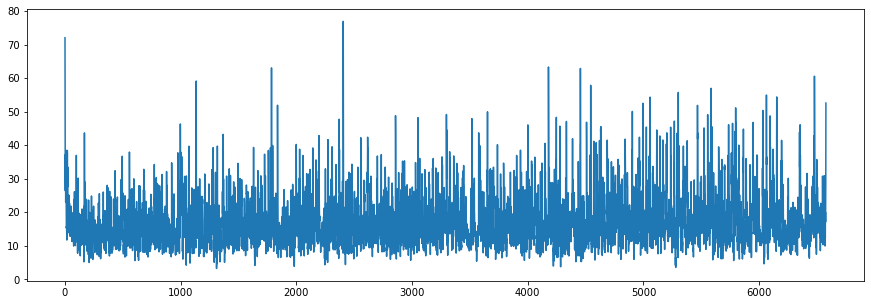

In [140]:
mouse = 52
plane = 5
session_num = 20
plane_dir = base_dir / f'{mouse:03}' / f'plane_{plane}'
session_dir = plane_dir / f'{session_num:03}' / 'plane0'
roi_dir = session_dir / 'roi'
refined_frame_time = pd.read_pickle(roi_dir / 'refined_frame_time.pkl')
use_ind = np.where(~refined_frame_time.remove_trial.values)[0]

spks = np.load(roi_dir / 'spks_reduced.npy')
spks = spks[:,use_ind]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.mean(spks, axis=0))

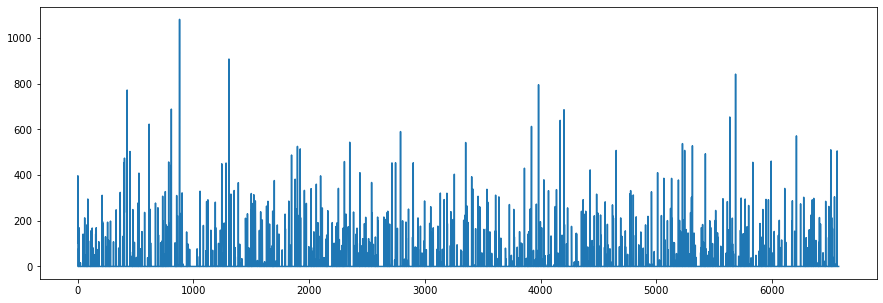

In [152]:
si = 50
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(spks[si,use_ind])

In [15]:
spks.shape

(192, 7780)

In [159]:
use_mice_df.query('mouse==52 and plane==5')

,mouse,plane,session,session_type,depth_matched,processing_error,remove_frame_ind
1340,52,5,001,training,True,False,"[0, 32]"
1341,52,5,003,test_naive,True,False,"[0, 186]"
1343,52,5,006,training,True,False,[0]
1344,52,5,007,training,True,False,"[0, 142]"
1345,52,5,008,training,True,False,"[0, 160]"
1346,52,5,009,training,True,False,"[0, 210]"
1347,52,5,010,training,True,False,"[0, 133]"
1348,52,5,011,training,True,False,"[0, 142]"
1349,52,5,012,training,True,False,"[0, 236]"
1350,52,5,013,training,True,False,[0]


# Conclusion
- Fixed all problems.
    - There could be more data.bin file corruption. But cannot check them all now. If there are some suspicious results, first look at the full movie from data.bin.
- JK052 had bubble issues after S018.
    - Remove S019.
    - Use S020 and S021. S021 is expert test session and is perfect. S020 has a minor bubble issue at the left top corner appearing later, but it should be fine.
